## Deep Learning with Pytorch: Part I

Before building a Deep Neural Network (DNN), it is crucial to master some fundamental programming skills. This week, we will cover:
- **Visualizing data using ```Matplotlib```**
- **Saving and loading data using ```scipy.io``` and ```h5py```**
- **Parsing and managing datasets with ```torch.utils.data```**
- **Additional useful techniques (Optional but helpful)**

## (1) Visualizing Data with Matplotlib

Before training a model, it’s essential to visualize the data to understand its structure, distribution, and potential issues. The ```matplotlib``` library is a fundamental tool for plotting in Python.

### (1.1) Basic Plotting Skills
- ```plt.plot()```: Line plots
- ```plt.scatter()```: Scatter plots
- ```plt.imshow()```: Display images

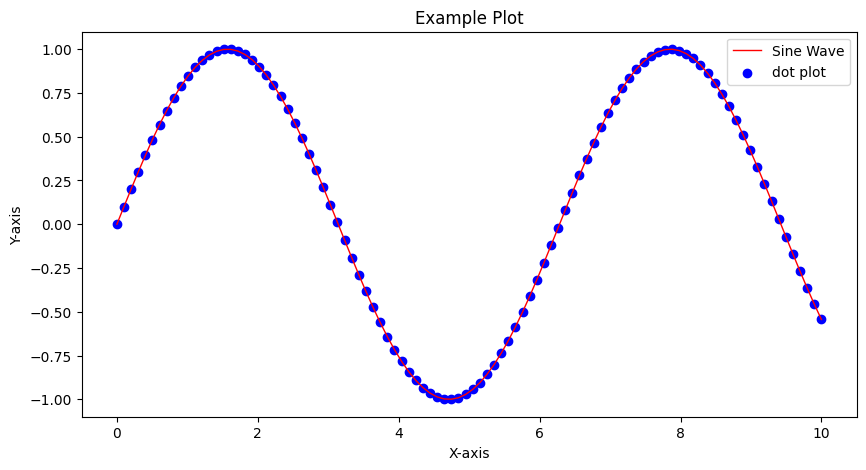

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a simple line plot
plt.figure(figsize=(10,5))
plt.plot(x, y, label="Sine Wave", linewidth=1., color='r') # Plot curves
plt.scatter(x,y, label='dot plot', marker='o', color='b') # Plot dots
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Example Plot")
plt.legend()
plt.show()

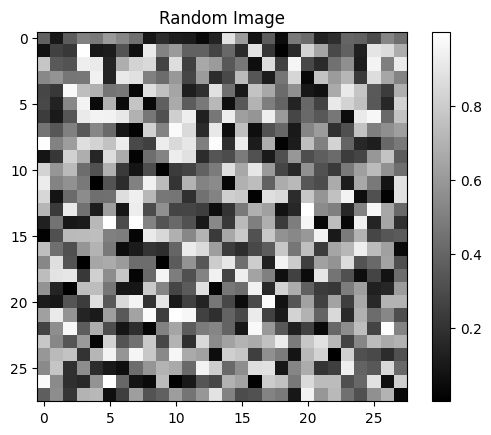

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random grayscale image
image = np.random.rand(28, 28)

plt.imshow(image, cmap='gray') # Plot images
plt.colorbar()
plt.title("Random Image")
plt.show()

### (1.2) Plotting 2D Figures (Contour and Surface Plots)
2D plots help visualize scalar fields and functions of two variables, which is useful for representing loss landscapes, heatmaps, and decision boundaries.

#### (1.2.1) Contour Plots

A contour plot represents a 3D function in 2D by drawing level curves where the function takes the same value.

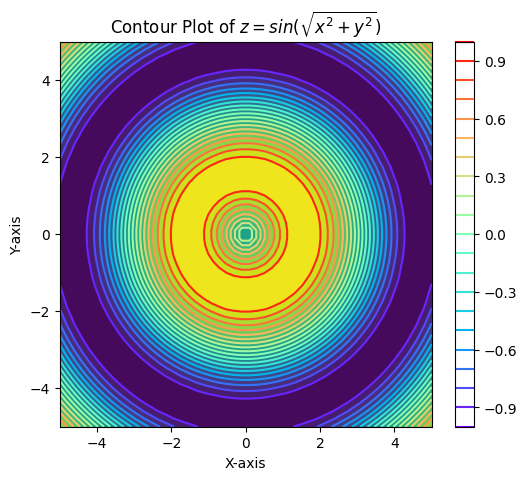

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D function
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot contour map
plt.figure(figsize=(6,5))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis') # filled contours
contour = plt.contour(X, Y, Z, levels=20, cmap='rainbow') # contour lines
plt.colorbar(contour)  # Add color bar
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Contour Plot of $z=sin(\sqrt{x^2 + y^2})$")
plt.show()

### (1.2.2) Surface Plots

A surface plot visualizes a function in 3D space.

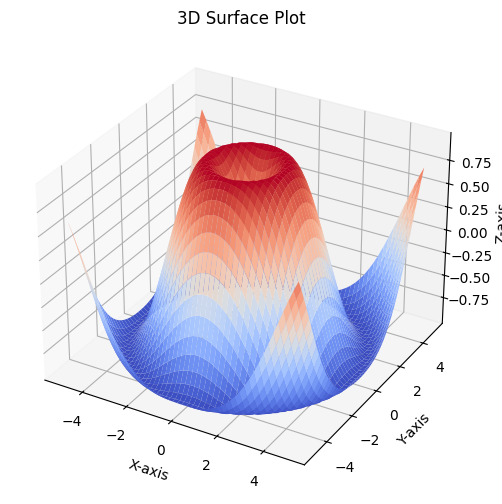

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d') # Enables 3D plotting.

# Plot surface
ax.plot_surface(X, Y, Z, cmap='coolwarm') # Creates a 3D surface.

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Surface Plot")

plt.show()

### (1.3) Plotting Multiple Figures in One Plot

When comparing multiple datasets, it’s useful to plot multiple figures in the same plot using subplots or overlapping plots.

#### (1.3.1) Using subplot for Multiple Plots

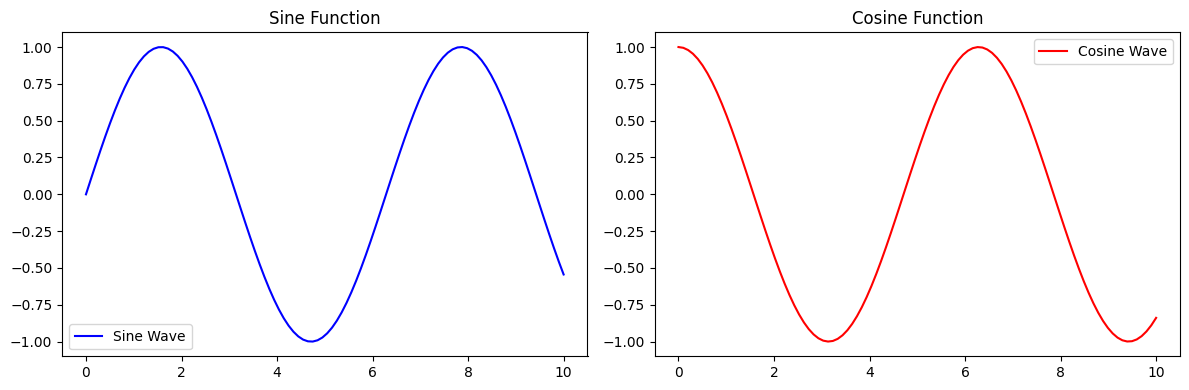

In [47]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Creates multiple subplots: 2 rows, 1 column

# Plots on each subplot with axes[i].plot()

# First subplot
axes[0].plot(x, y1, label="Sine Wave", color="blue")
axes[0].set_title("Sine Function")
axes[0].legend()

# Second subplot
axes[1].plot(x, y2, label="Cosine Wave", color="red")
axes[1].set_title("Cosine Function")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### (1.3.2) Using subplot for 2D Heatmaps

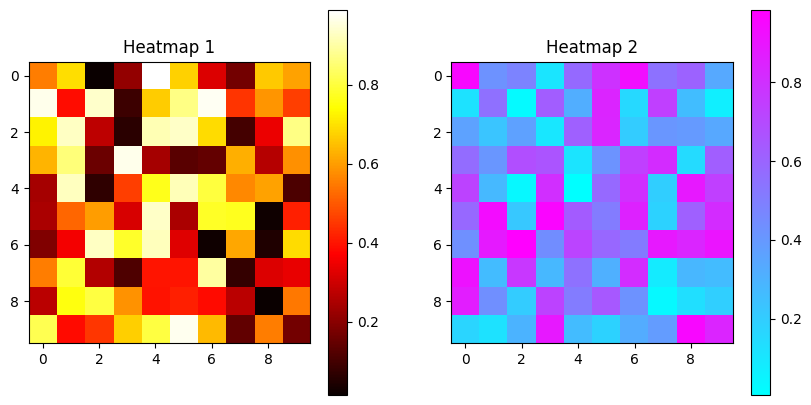

In [48]:
data1 = np.random.rand(10, 10)
data2 = np.random.rand(10, 10)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First heatmap
im1 = axes[0].imshow(data1, cmap="hot")
plt.colorbar(im1, ax=axes[0])  # Add color bar
axes[0].set_title("Heatmap 1")

# Second heatmap
im2 = axes[1].imshow(data2, cmap="cool")
plt.colorbar(im2, ax=axes[1])
axes[1].set_title("Heatmap 2")

plt.show()

### (1.3) High-Resolution Plot Using griddata

When function values are available only at discrete points, we can use grid interpolation to estimate values on a dense grid for visualization.

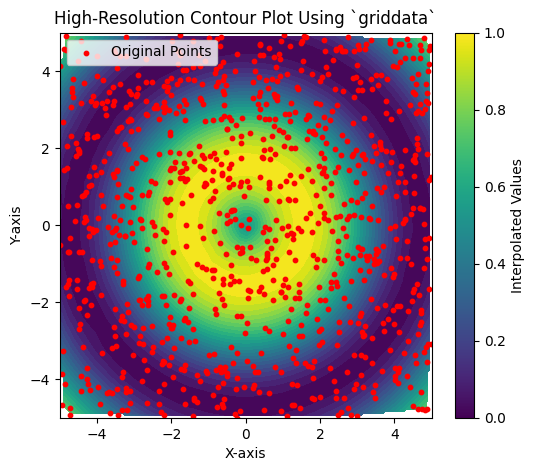

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Step 1: Generate scattered data points
num_points = 1000  # Number of scattered points
x = np.random.uniform(-5, 5, num_points)  # Random x-coordinates
y = np.random.uniform(-5, 5, num_points)  # Random y-coordinates
z = np.sin(np.sqrt(x**2 + y**2))  # Compute function values at scattered points

# Step 2: Create a dense grid for interpolation
grid_x, grid_y = np.mgrid[-5:5:200j, -5:5:200j]  # High-resolution grid

# Step 3: Interpolate using `griddata`
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')  # Cubic interpolation ['nearest', 'linear', 'cubic']

# Step 4: Plot the high-resolution interpolated function
plt.figure(figsize=(6,5))
plt.contourf(grid_x, grid_y, grid_z, levels=30, cmap="viridis")  # Filled contour plot
plt.scatter(x, y, color="red", marker="o", s=10, label="Original Points")  # Show original data points
plt.colorbar(label="Interpolated Values")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("High-Resolution Contour Plot Using `griddata`")
plt.legend()
plt.show()

## (2) Saving and Loading Data

Often, we need to save and load datasets efficiently. Two common libraries for handling scientific data are ```scipy.io``` and ```h5py```.

### (2.1) Saving and Loading ```.mat``` Files with ```scipy.io```
MATLAB ```.mat``` files are commonly used for storing numerical data.

In [7]:
from scipy.io import savemat, loadmat

# Create a dictionary of arrays
data = {"x": np.array([1, 2, 3]), "y": np.array([4, 5, 6])}

# Save to a .mat file
savemat("data/example.mat", data)

# Load the .mat file
loaded_data = loadmat("data/example.mat")
print(loaded_data)
print('The keys:', loaded_data.keys())

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Mar 18 10:53:19 2025', '__version__': '1.0', '__globals__': [], 'x': array([[1, 2, 3]]), 'y': array([[4, 5, 6]])}
The keys: dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])


### (2.2) Using ```h5py``` for Large Datasets

HDF5 files (```.h5```) are well-suited for **large datasets**.

The keys: <KeysViewHDF5 ['x', 'y']>


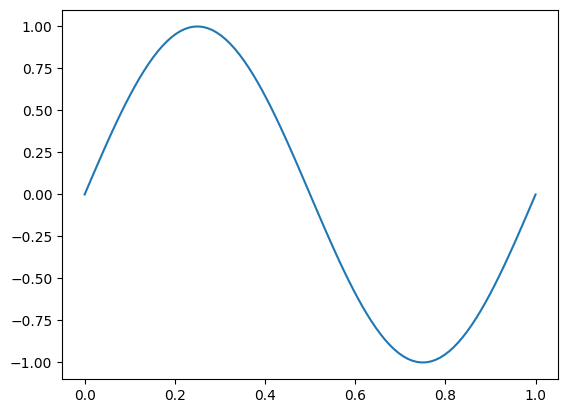

In [31]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Create an HDF5 file and save data
with h5py.File("data/example.h5", "w") as f:
    x = np.linspace(0,1, 100)
    y = np.sin(2. * np.pi * x)
    f.create_dataset(name="x", data=x)
    f.create_dataset(name="y", data=y)

# Load data from the HDF5 file
with h5py.File("data/example.h5", "r") as f:
    print('The keys:', f.keys())
    #
    loaded_x = f["x"][:]
    loaded_y = f["y"][:]
    #
    plt.figure()
    plt.plot(loaded_x, loaded_y)
    plt.show()

## (3) Parsing and Managing Data with ```torch.utils.data```

When working with deep learning models, we often need to process, load, and manage datasets efficiently. PyTorch provides ```torch.utils.data.Dataset``` and ```torch.utils.data.DataLoader``` for this purpose.

### (3.1) Creating a Custom Dataset

In [32]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Example usage
data = np.random.rand(100, 10)
labels = np.random.randint(0, 2, size=(100,))
dataset = CustomDataset(data, labels)

print(len(dataset))  # Output: 100
print(dataset[0])    # Output: (tensor([...]), tensor(0 or 1))

100
(tensor([0.8815, 0.3112, 0.2381, 0.0377, 0.6169, 0.8793, 0.8670, 0.3567, 0.4675,
        0.3892]), tensor(0.))


### (3.2 )Using DataLoader for Batching

Once we have a dataset, we can use DataLoader to create mini-batches for training.

**Key Features**
- ```batch_size```: Number of samples per batch.
- ```shuffle=True```: Randomly shuffles data every epoch.

In [34]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Iterate through batches
for batch_data, batch_labels in dataloader:
    print('The shape of data batch:', batch_data.shape, 'The shape of label batch:', batch_labels.shape)
    break  # Show the first batch

The shape of data batch: torch.Size([16, 10]) The shape of label batch: torch.Size([16])


## (4) Additional Useful Techniques

These skills are not strictly required but will make working with PyTorch easier.

### (4.1) Handling GPU Computation

Using a GPU accelerates training.

**Note:** Always move models and tensors to the **same device** before training.

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.tensor([1.0, 2.0, 3.0]).to(device)
print(tensor.device)

cpu


### (4.2) Normalizing Data for Faster Training

Normalizing input features can improve model convergence.

In [37]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
normalized_data = (data - mean) / std
print(normalized_data.shape)

(100, 10)


In PyTorch, you can normalize tensors with:

In [38]:
import torchvision.transforms as transforms

transform = transforms.Normalize(mean=[0.5], std=[0.5])  # Example for 1D data

### (4.3) Saving and Loading PyTorch Models
**Note:** Saving models allows you to resume training or deploy them.

In [ ]:
import torch.nn as nn

# Define a simple model
model = nn.Linear(10, 1)

# Save model
torch.save(model.state_dict(), "model/example.pth")

# Load model
model.load_state_dict(torch.load("model/example.pth"))
model.eval()

### (4.4) Logging Training Progress

Use ```tqdm``` to display a progress bar.

In [39]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    pass  # Simulating training iterations

100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 3088589.10it/s]


## Summary
|Topic|Skills Learned|
|---|---|
|**Matplotlib**| Plotting line graphs, scatter plots, histograms, and images|
|**Saving/Loading Data**| Using ```scipy.io``` for ```.mat``` files, ```h5py``` for ```.h5``` files|
|**Data Handling in PyTorch**| Creating custom datasets with ```Dataset```, batching with ```DataLoader```|
|**Additional Skills**|GPU acceleration, normalization, saving/loading models, progress logging|


## Exercises
#### **Exercise 1: Basic Plotting with Matplotlib**
Write a Python script to:
- Generate 100 random points $(x, y)$ in the range [-10, 10].
- Compute function values using $f(x, y) = \sin(x) \cos(y)$.
- Create a **scatter plot** where:
    - Points are colored based on function values.
    - A color bar is added.
- Label the axes and add a title.

#### **Exercise 2: Multiple Subplots in One Figure**
Write a Python script that:
- Generates 100 random points $(x, y)$ in [-5, 5].
- Computes function values for two functions:
    - $z_1 = \sin(xy)$
    - $z_2 = e^{-x^2 - y^2}$
- Uses ```plt.subplots()``` to create a 1×2 subplot layout:
    - The first subplot shows a ```scatter``` plot of $z_1$.
    - The second subplot shows a ```contourf``` plot of $z_2$.
- Ensures clear labels, titles, and a shared color bar.

#### Exercise 3: Saving and Loading Data with ```scipy.io``` and ```h5py```
- Generate an array of 500 random numbers following a normal distribution.
- Save this data into a MAT file (.mat) using ```scipy.io.savemat()```.
- Load the data back and print the first 10 values.
- Save this data into a h5 file (.h5) using ```h5py```.
- Load the data back and print the first 10 values.

#### Exercise 4: Using ```torch.utils.data``` for Data Handling
- Generate 200 samples with two features:
    - $x_1$ from a uniform distribution in [0, 1].
    - $x_2$ from a normal distribution with mean 0, std 1.
- Define a dataset class using ```torch.utils.data.Dataset``` that:
    - Stores $x_1, x_2$, and computes $y = x_1^2 + \sin(x_2)$.
    - Implements ```__len__``` and ```__getitem__```.
- Use ```DataLoader``` to create **batches of size 10**, then print one batch.

#### Exercise 5: High-Resolution Contour Plot Using ```griddata```
- Generate 500 random points in the range [-3, 3] × [-3, 3].
- Compute function values using $f(x,y) = \cos(\sqrt{x^2 + y^2})$.
- Use ```griddata``` to interpolate onto a **dense grid** (200×200 resolution).
- Create a ```contourf``` plot of the interpolated function.
- Overlay the original scattered points on the plot.